In [14]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

                                 Open        High         Low       Close  \
Date                                                                        
2012-05-04 00:00:00-04:00  111.006091  111.631161  109.723891  109.788002   
2012-05-07 00:00:00-04:00  109.395353  110.236796  109.355294  109.868172   
2012-05-08 00:00:00-04:00  109.211017  109.603694  108.121150  109.427391   
2012-05-09 00:00:00-04:00  108.265412  109.475480  107.776574  108.778290   
2012-05-10 00:00:00-04:00  109.531544  109.667788  108.754224  109.002647   

                              Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                          
2012-05-04 00:00:00-04:00  193927300        0.0           0.0            0.0  
2012-05-07 00:00:00-04:00  127765900        0.0           0.0            0.0  
2012-05-08 00:00:00-04:00  213377700        0.0           0.0            0.0  
2012-05-09 00:00:00-04:00  220752500        0.0           0.0    

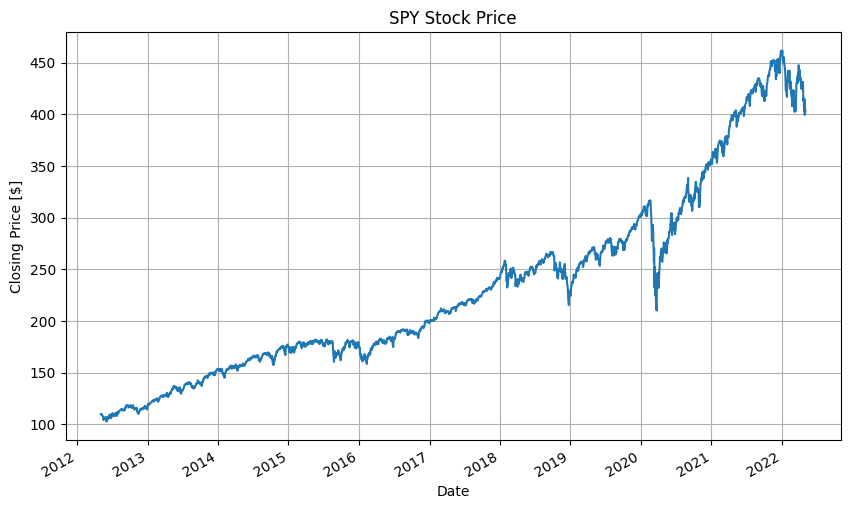

In [45]:
ticker = yf.Ticker('SPY')

# Market Data
start_date = '2012-05-04'
end_date = '2022-05-04'
hist = ticker.history(start=start_date, end=end_date)
print(hist.head())

# Pulling Closing Price Data
hist = hist[['Close']]
print(hist)

# Plotting Price Data
hist['Close'].plot(title="SPY Stock Price", ylabel="Closing Price [$]", figsize=[10, 6])
plt.grid()

In [46]:
# Create Day Count, Price and Change Lists
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]  # Removing the first term

# Statistics
mean = np.mean(change)
std_dev = np.std(change)
print('\nMean percent change: ' + str(round(mean*100, 2)) + '%')
print('Standard Deviation of percent change: ' + str(round(std_dev*100, 2)) + '%')


Mean percent change: 0.06%
Standard Deviation of percent change: 1.04%


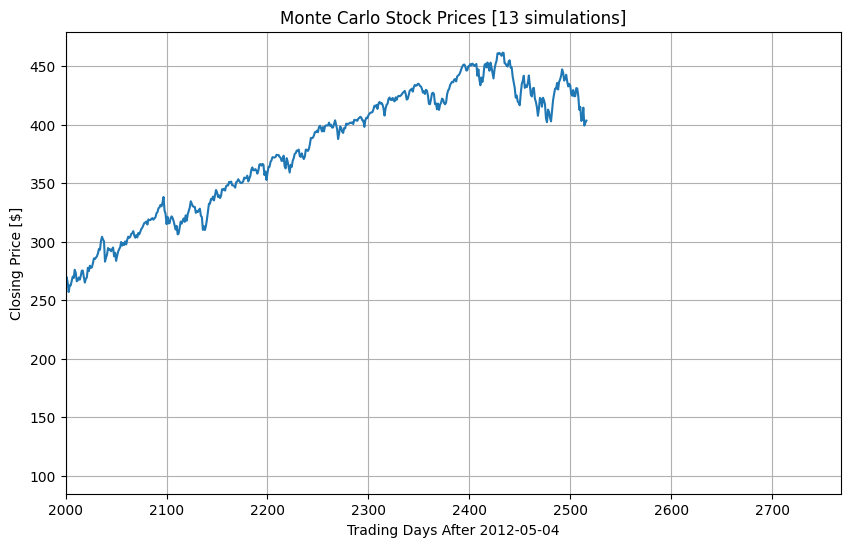

In [57]:
simulations = 13 # Simulation Number
days_to_sim = 1*252 # Prediction Period

fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + 
          " simulations]")
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([2000, len(days)+days_to_sim])
plt.grid()

# Lists for Analysis
close_end = []
above_close = []


Predicted closing price after 13 simulations: $476.49
Predicted percent increase after 1 year: 18.06%
Probability of stock price increasing after 1 year: 69.23%


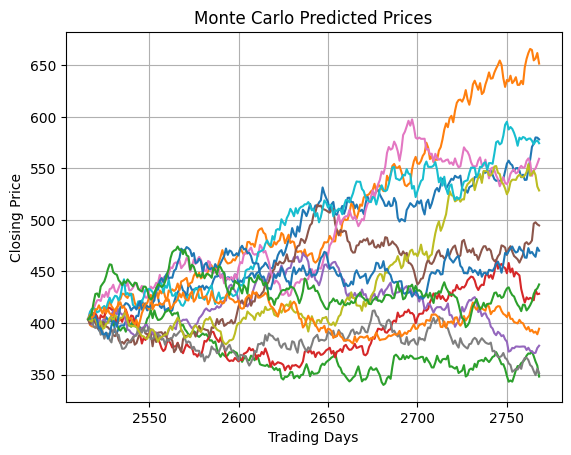

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from random import random

# Number of Simulations
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]
    
    # Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1] + 1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1] * (1 + perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)

# Set title, labels, and grid
plt.title('Monte Carlo Predicted Prices')
plt.xlabel('Trading Days')
plt.ylabel('Closing Price')
plt.grid(True)

# Average Closing Price and Probability of Increasing After 1 Year
average_closing_price = sum(close_end) / simulations
average_perc_change = (average_closing_price - price_orig[-1]) / price_orig[-1]
probability_of_increase = sum(above_close) / simulations
print('\nPredicted closing price after ' + str(simulations) + 
      ' simulations: $' + str(round(average_closing_price, 2)))
print('Predicted percent increase after 1 year: ' + 
      str(round(average_perc_change * 100, 2)) + '%')
print('Probability of stock price increasing after 1 year: ' + 
      str(round(probability_of_increase * 100, 2)) + '%')

plt.show()